<a href="https://colab.research.google.com/github/guo8orou/github/blob/main/%ED%83%80%EC%9D%B4%ED%83%80%EB%8B%89%EC%97%B0%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 이것은 결코 좋은 분석이 아닙니다! 
### 스터디용... kaggle 참여 과정 quick overview에 가깝습니다

In [ ]:
import pandas as pd
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
df=train

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

Survived가 binary인 관계로 크로스탭을 이용해 각 X-y 관계를 살펴봅시다

In [ ]:
list(df)

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

In [ ]:
pd.crosstab([df.Pclass], [df.Survived],colnames=['Survived'], dropna=False,margins=True).style.background_gradient(cmap='Purples')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


1등석, 3등석은 확실히 생존에 영향을 준 것으로 보입니다

In [ ]:
pd.crosstab([df.Sex], [df.Survived],colnames=['Survived'], dropna=False,margins=True).style.background_gradient(cmap='Purples')

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


성별은 매우 영향을 미쳤습니다

In [ ]:
pd.crosstab([df.SibSp], [df.Survived],colnames=['Survived'], dropna=False,margins=True).style.background_gradient(cmap='GnBu')

Survived,0,1,All
SibSp,,,
0,398,210,608
1,97,112,209
2,15,13,28
3,12,4,16
4,15,3,18
5,5,0,5
8,7,0,7
All,549,342,891


형제자매 배우자는 없거나 3명 이상인 경우 사망률이 높아지네요!

없음/ 3명 이상 / 5명이상으로 나눠볼 수 있을 것 같아요

In [ ]:
pd.crosstab([df.Parch], [df.Survived],colnames=['Survived'], dropna=False,margins=True).style.background_gradient(cmap='GnBu')

Survived,0,1,All
Parch,,,
0,445,233,678
1,53,65,118
2,40,40,80
3,2,3,5
4,4,0,4
5,4,1,5
6,1,0,1
All,549,342,891


부모나 아이 일행도 없는 경우 사망이 많아집니다

4명 이상은 데이터 수가 적긴 하지만 위와 비슷하게 사망율을 높이는 이유가 있을듯 하네요

이 부분은 일행이 많은 사람들의 다른 정보도 확인해보면 좋겠네요

In [ ]:
pd.crosstab([df.Embarked], [df.Survived],colnames=['Survived'], dropna=False,margins=True).style.background_gradient(cmap='GnBu')

Survived,0,1,All
Embarked,,,
C,75,93,168
Q,47,30,77
S,427,217,644
All,549,342,891


S항구에서 승선한 사람들의 사망율이 높군요... 



---
name, ticket은 복잡해서... 제외하고
그룹화가 필요한 변수들로 작업을 해볼게요

In [ ]:
pd.crosstab([df.Age], [df.Survived],colnames=['Survived'], dropna=False,margins=True).style.background_gradient(cmap='Purples')

Survived,0,1,All
Age,,,
0.42,0,1,1
0.67,0,1,1
0.75,0,2,2
0.83,0,2,2
0.92,0,1,1
1.0,2,5,7
2.0,7,3,10
3.0,1,5,6
4.0,3,7,10


*그룹화*



In [ ]:
age=df.Age
fare=df.Fare
cab=df.Cabin

In [ ]:
#멋지게 그룹화하는 방법을 모르겠네요 + 생존율 갈리는 나이대를 임의로 골라봤어요

def age1(age):
  if age < 1: return 0
  elif age<=5: return 1
  elif age<=17: return 2
  elif age<52: return 3
  else: return 4

In [ ]:
df.age1=df.Age.apply(age1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


In [ ]:
pd.crosstab([df.age1], [df.Survived],colnames=['Survived'], dropna=False,margins=True).style.background_gradient(cmap='Purples')

Survived,0,1,All
Age,,,
0,0,7,7
1,13,24,37
2,39,30,69
3,335,209,544
4,162,72,234
All,549,342,891


좀 못마땅하긴 하지만 0,1,3,4에서 대체적인 생존율 차이를 보이도록 나뉘었습니다
5살 이하 애기들은 많이 살았고, 17 이상~ 52 청춘(?)들의 사망이 좀 높았고 53이상 노인들은... 사망율이 매우 높네요

Fare는 연속 변수라 분포를 한번 보고 갑시다

(array([732., 106.,  31.,   2.,  11.,   6.,   0.,   0.,   0.,   3.]),
 array([  0.     ,  51.23292, 102.46584, 153.69876, 204.93168, 256.1646 ,
        307.39752, 358.63044, 409.86336, 461.09628, 512.3292 ]),
 <a list of 10 Patch objects>)

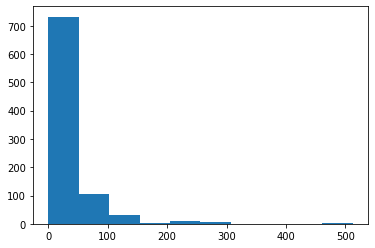

In [ ]:
plt.hist(df.Fare, bins=10)
#음... 같은 단위씩 쪼개면 큰일나겠군요

In [ ]:
import numpy as np
np.quantile(df.Fare,0.1)

7.55

In [ ]:
#quantile로 10분위수를 구해 쪼개봅시다

def fare1(fare):
  if fare < np.quantile(df.Fare,0.1): return 1
  elif fare < np.quantile(df.Fare,0.2): return 2
  elif fare < np.quantile(df.Fare,0.3): return 3
  elif fare < np.quantile(df.Fare,0.4): return 4
  elif fare < np.quantile(df.Fare,0.5): return 5
  elif fare < np.quantile(df.Fare,0.6): return 6
  elif fare < np.quantile(df.Fare,0.7): return 7
  elif fare < np.quantile(df.Fare,0.8): return 8
  elif fare < np.quantile(df.Fare,0.9): return 9
  else: return 10

In [ ]:
df.fare1=df.Fare.apply(fare1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


In [ ]:
pd.crosstab([df.fare1], [df.Survived],colnames=['Survived'], dropna=False,margins=True).style.background_gradient(cmap='Purples')

Survived,0,1,All
Fare,,,
1,76,12,88
2,54,24,78
3,59,17,76
4,83,14,97
5,57,44,101
6,56,38,94
7,43,45,88
8,52,35,87
9,48,44,92


오... 하위 40%는 사망이 거의 3배네요
상위 10%는 확실히 잘 산 거같습니다

만약을 위해 fare2 를 만들어봐요!

In [ ]:
def fare2(f1):
  if f1<=4: return 0
  elif f1==10: return 2
  else: return 1
df.fare2= df.fare1.apply(fare2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """


In [ ]:
pd.crosstab([df.fare2], [df.Survived],colnames=['Survived'], dropna=False,margins=True).style.background_gradient(cmap='Purples')

Survived,0,1,All
Fare,,,
0,272,67,339
1,256,206,462
2,21,69,90
All,549,342,891


괜찮게 취합이 된듯 하네요~!

In [ ]:
pd.crosstab([df.Cabin], [df.Survived],colnames=['Survived'], dropna=False,margins=True).style.background_gradient(cmap='Purples')

Survived,0,1,All
Cabin,,,
A10,1,0,1
A14,1,0,1
A16,0,1,1
A19,1,0,1
A20,0,1,1
A23,0,1,1
A24,1,0,1
A26,0,1,1
A31,0,1,1


cabin은 우선 첫글자를 따서 취합해보죠!

In [ ]:
def cab1(cab):
  return str(cab)[:1]

In [ ]:
df.cab1=df.Cabin.apply(cab1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


내친김에 Parch랑 Sibsp도 하겠습니다

In [ ]:
df.SibSp

0      1
1      1
2      0
3      1
4      0
      ..
886    0
887    0
888    1
889    0
890    0
Name: SibSp, Length: 891, dtype: int64

In [ ]:
def sib(sib):
  if sib==0: return 1
  elif sib==1: return 3
  elif sib <=4: return 2
  else: return 0

In [ ]:
df.sib=df.SibSp.apply(sib)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


In [ ]:
pd.crosstab([df.sib], [df.Survived],colnames=['Survived'], dropna=False,margins=True).style.background_gradient(cmap='Purples')

Survived,0,1,All
SibSp,,,
0,12,0,12
1,398,210,608
2,42,20,62
3,97,112,209
All,549,342,891


In [ ]:
#나쁘지 않습니다

In [ ]:
df.pc=df.Parch.apply(pc)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


In [ ]:
pd.crosstab([df.pc], [df.Survived],colnames=['Survived'], dropna=False,margins=True).style.background_gradient(cmap='Purples')

Survived,0,1,All
Parch,,,
0,9,1,10
1,445,233,678
2,95,108,203
All,549,342,891


괜찮게 나뉜 것 같긴 한데 약간 절망적이군요

In [ ]:
def pc(pc):
  if pc>=4: return 0
  elif pc==0: return 1
  else: return 2

In [ ]:
pd.crosstab([df.cab1], [df.Survived],colnames=['Survived'], dropna=False,margins=True).style.background_gradient(cmap='Purples')

Survived,0,1,All
Cabin,,,
A,8,7,15
B,12,35,47
C,24,35,59
D,8,25,33
E,8,24,32
F,5,8,13
G,2,2,4
T,1,0,1
n,481,206,687


B,D,E와 C,F와 A,G, 나머지를 묶으면 되겠군요~ n은 nan의 n인데 객실이 따로 없던 = 가난한..? 사람이려나요...ㅠ

In [ ]:
df.cab1[df.cab1=='F']

66     F
75     F
128    F
148    F
183    F
193    F
340    F
345    F
516    F
618    F
699    F
715    F
776    F
Name: Cabin, dtype: object

In [ ]:
def cab2(cab):
  if cab=='n' or cab=='T': return 0
  elif cab=='A' or cab=='G': return 1
  elif cab=='C' or cab=='F': return 2
  elif cab=='B' or cab=='D' or 'E': return 3

#혹시라도 잘못 인식 될까봐 else 없이!

In [ ]:
df.cab2=df.cab1.apply(cab2)

In [ ]:
pd.crosstab([df.cab2], [df.Survived],colnames=['Survived'], dropna=False,margins=True).style.background_gradient(cmap='Purples')

Survived,0,1,All
Cabin,,,
0,482,206,688
1,10,9,19
2,29,43,72
3,28,84,112
All,549,342,891


조습니다~ 대충 잘 나뉜 것 같군요

In [ ]:
pd.crosstab([df.Sex,df.Pclass], [df.Survived],colnames=['Survived'], dropna=False,margins=True).style.background_gradient(cmap='Purples')

원래 이렇게 크로스탭도 보려고 했는데 머신러닝이 궁금하니까 다음 기회에~~ 

좀 전처리가 빈약한 감이 없지 않지만 지금까지 사용한 기법들을 적용해볼게요~ 

# 머신러닝 가보자고~

In [ ]:
list(df)
# 이중 Survived= y를 분리하고, Passengerld, Name, Ticket은 버립시다 - Embarked는 애매한데 일단 보류

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

In [ ]:
#멋있게 지우는 방법을 모릅니더...
train_y=df.Survived
del df['Name']
del df['Ticket']
del df['PassengerId']

In [ ]:
del df['Survived']
list(df)

['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin', 'Embarked']

In [ ]:
#생각해보니 위 작업이 쓸모없다는걸 깨달았습니다

train=pd.DataFrame()
train['age']=df.Age.apply(age1)
train['sib']=df.SibSp.apply(sib)
train['pc']=df.Parch.apply(pc)
train['cab']=df.cab1.apply(cab2)
train['fare']=df.fare1.apply(fare2)
train['sex']=df.Sex
# 그대로 사용할 Pclass 추가
train['class']=df.Pclass

왠지 Sex,Embarked가 숫자여야 할 것 같은데 이 부분은 멋지게 인코딩을 사용해보겠습니다

In [ ]:
from sklearn.preprocessing import LabelEncoder
em=LabelEncoder()
train['emb']=em.fit_transform(df['Embarked'].apply(str).values)
#str이 없으면 object라서 빠꾸를 먹입니다 ㅠ

In [ ]:
from sklearn.preprocessing import LabelEncoder
sex=LabelEncoder()
train['sex']=sex.fit_transform(df['Sex'].apply(str).values)
#마찬가지

In [ ]:
train.head()

,age,sib,pc,cab,fare,sex,class,emb
0,3,3,1,0,0,1,3,2
1,3,3,1,2,1,0,1,0
2,3,1,1,0,0,0,3,2
3,3,3,1,2,1,0,1,2
4,3,1,1,0,0,1,3,2


이제 방치했던 test 셋을 다룰 차례입니다

In [ ]:
tf=test

In [ ]:
#더 멋진 방법이 있을지도 모르지만 일단 수작업으로...

test=pd.DataFrame()
test['age']=tf.Age.apply(age1)
test['sib']=tf.SibSp.apply(sib)
test['pc']=tf.Parch.apply(pc)
test['cab']=tf.Cabin.apply(cab1).apply(cab2)
test['fare']=tf.Fare.apply(fare1).apply(fare2)
test['sex']=sex.transform(tf['Sex'].apply(str).values)
test['class']=tf.Pclass
test['emb']=em.transform(tf['Embarked'].apply(str).values)


In [ ]:
train.head()

,age,sib,pc,cab,fare,sex,class,emb
0,3,3,1,0,0,1,3,2
1,3,3,1,2,1,0,1,0
2,3,1,1,0,0,0,3,2
3,3,3,1,2,1,0,1,2
4,3,1,1,0,0,1,3,2


In [ ]:
test.head()

,age,sib,pc,cab,fare,sex,class,emb
0,3,1,1,0,0,1,3,1
1,3,3,1,0,0,0,3,2
2,4,1,1,0,0,1,2,1
3,3,1,1,0,0,1,3,2
4,3,3,2,0,1,0,3,2


이렇게 해도 되나? 다 범주 변수만 남아버렸습니다

그런데... 테스트 y는 없으니까 X를 뜯어서 써볼게요

In [ ]:
X=train
y=tr.Survived

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

#퍼셉트론~

In [ ]:
from sklearn.linear_model import Perceptron
ppn=Perceptron(eta0=0.1, random_state=1)
ppn.fit(X_train, y_train)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=0.1,
           fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=1, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
y_pred=ppn.predict(X_test)
from sklearn.metrics import accuracy_score
print('정확도: %.3f' % accuracy_score(y_test, y_pred))

정확도: 0.761


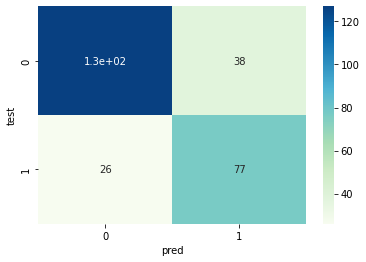

In [ ]:
sns.heatmap(pd.crosstab(y_test, y_pred, rownames=['test'],colnames=['pred']),annot=True,cmap='GnBu')

In [ ]:
y_ppn=ppn.predict(test)

혹시 모르니 eta를 바꿔봤는데... 잘 모르겠습니다.

In [ ]:
from sklearn.linear_model import LogisticRegression
#C는 규제 강도,,, 클수록 규제 적고 w 커짐
lr=LogisticRegression(C=100, random_state=1)
lr.fit(X_train, y_train)

LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred=lr.predict(X_test)
from sklearn.metrics import accuracy_score
print('정확도: %.3f' % accuracy_score(y_test, y_pred))

정확도: 0.802


아달린 보다 로지스틱이 낫군요~

둘의 차이점은 각각 활성화 함수로 선형(y=x), 시그모이드를 사용한다는 점이었죠

In [ ]:
y_lr=lr.predict(test)

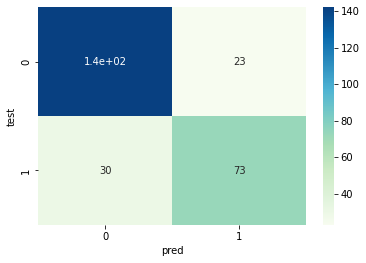

In [ ]:
sns.heatmap(pd.crosstab(y_test, y_pred, rownames=['test'],colnames=['pred']),annot=True,cmap='GnBu')

In [ ]:
from sklearn.svm import SVC
#C는 규제 강도,,, 클수록 규제 적고 w 커짐
svc=SVC(kernel='linear',C=1.0, random_state=1)
svc.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=1, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
y_pred=svc.predict(X_test)
from sklearn.metrics import accuracy_score
print('정확도: %.3f' % accuracy_score(y_test, y_pred))

정확도: 0.802


In [ ]:
y_svc=svc.predict(test)

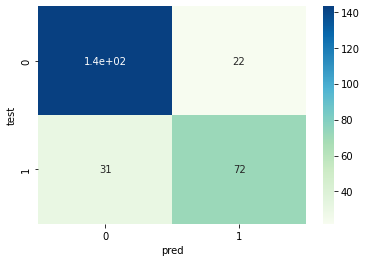

In [ ]:
sns.heatmap(pd.crosstab(y_test, y_pred, rownames=['test'],colnames=['pred']),annot=True,cmap='GnBu')

In [ ]:
from sklearn.tree import DecisionTreeClassifier
tr=DecisionTreeClassifier(criterion='gini',max_depth=4,random_state=1)
tr.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

In [ ]:
y_pred=tr.predict(X_test)
from sklearn.metrics import accuracy_score
print('정확도: %.3f' % accuracy_score(y_test, y_pred))

정확도: 0.799


In [ ]:
y_tr=tr.predict(test)

어라? 예상외로 결정 트리가 약합니다

궁금하니 트리 그림을 봅시다

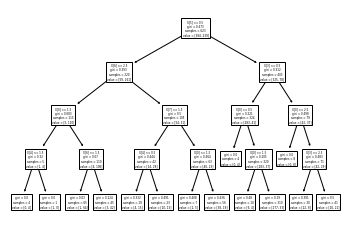

In [ ]:
from sklearn import tree
tree.plot_tree(tr)
plt.show()
#화질이 왜이러지

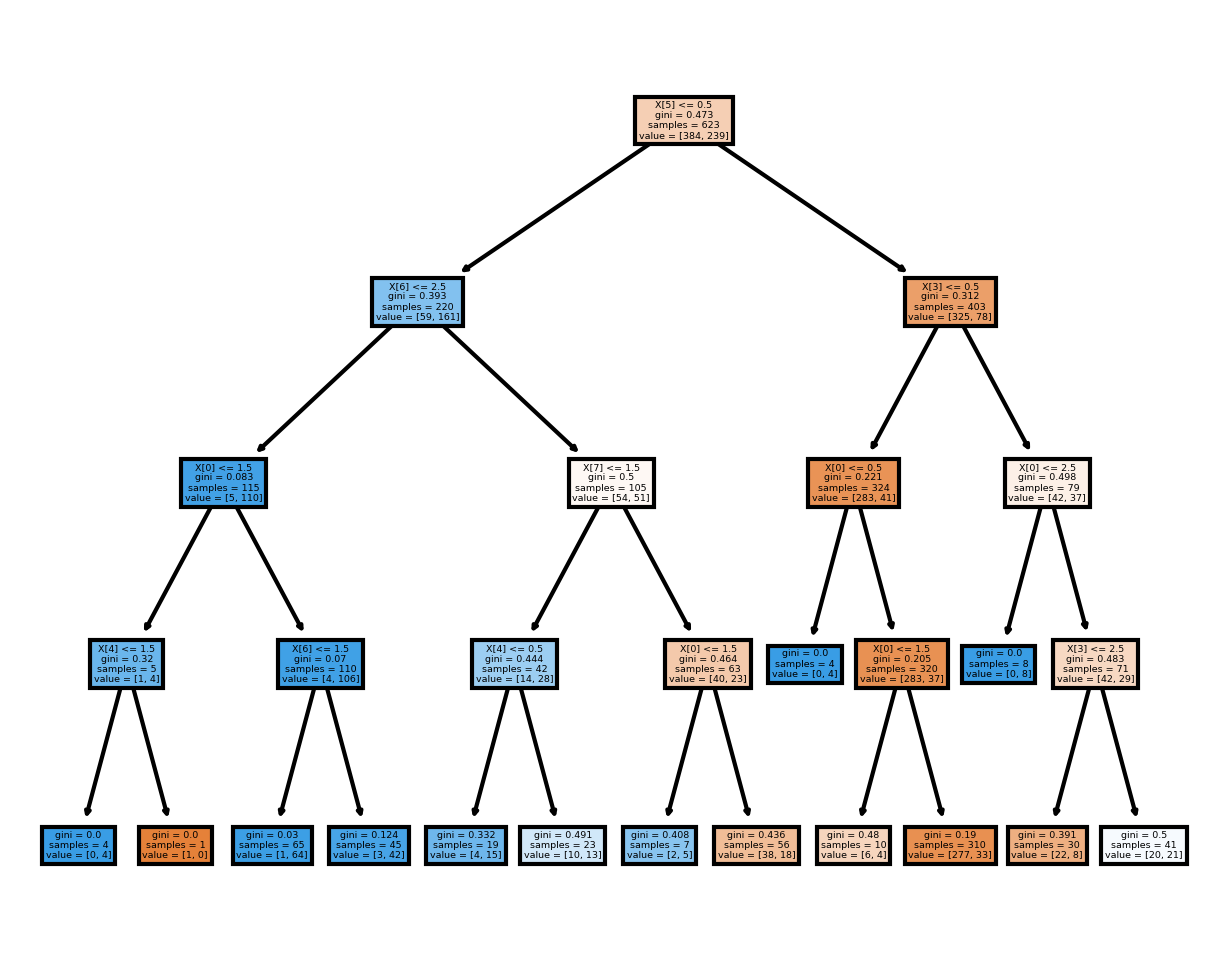

In [ ]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (5,4), dpi=300)
tree.plot_tree(tr,filled=True)
plt.show()

봐도 사실 잘 모르겠는데 노드를 +-1 더 해봅시다

In [ ]:
from sklearn.tree import DecisionTreeClassifier
tr=DecisionTreeClassifier(criterion='gini',max_depth=3,random_state=1)
tr.fit(X_train, y_train)

y_pred=tr.predict(X_test)
from sklearn.metrics import accuracy_score
print('정확도: %.3f' % accuracy_score(y_test, y_pred))

#오 과적합이 문제였는지 노드 4보다 3의 성능이 더 좋습니당

정확도: 0.821


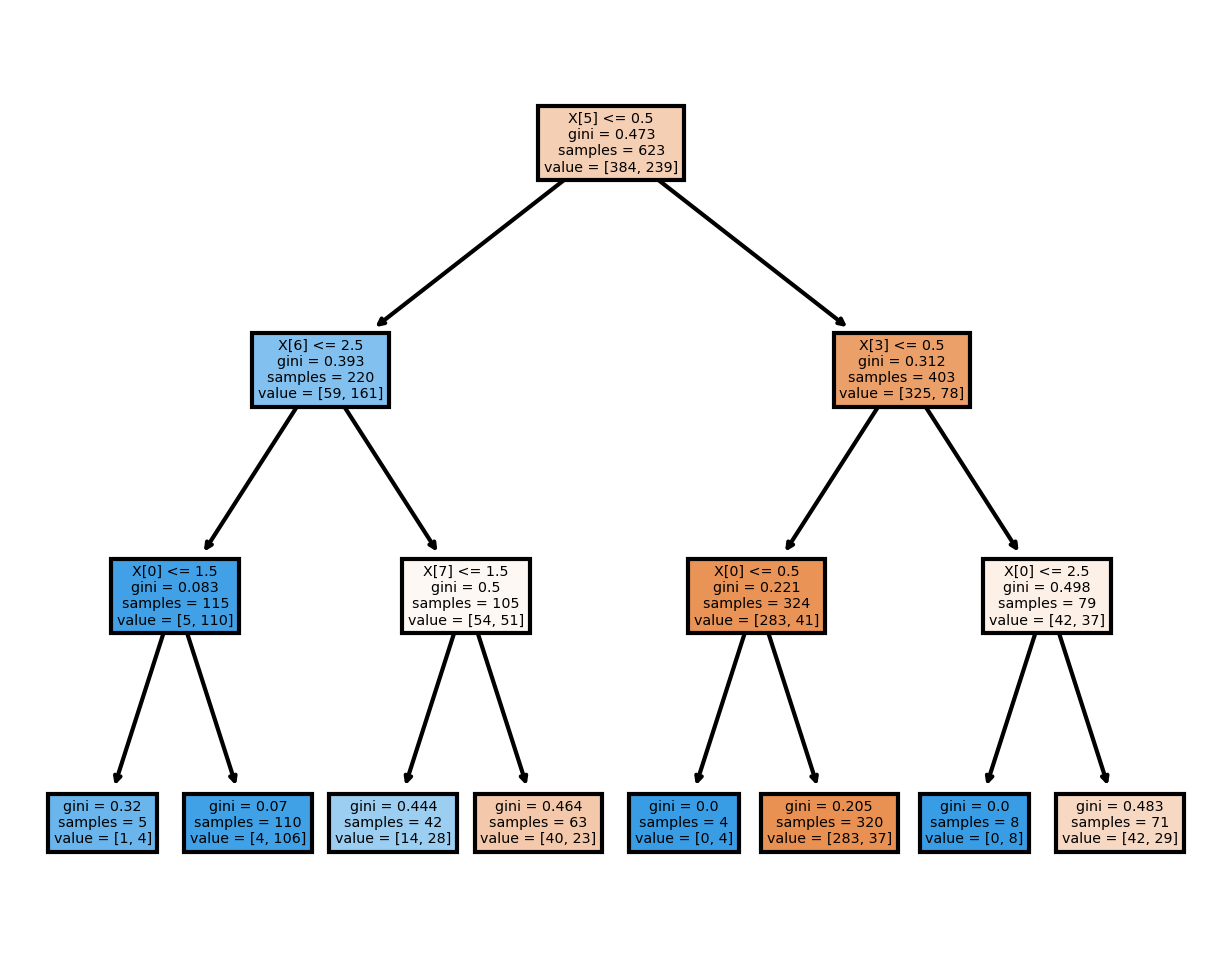

In [ ]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (5,4), dpi=300)
tree.plot_tree(tr,filled=True)
plt.show()

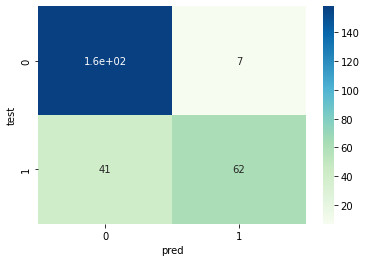

In [ ]:
sns.heatmap(pd.crosstab(y_test, y_pred, rownames=['test'],colnames=['pred']),annot=True,cmap='GnBu')

오잉? 실제는 생존했는데 사망으로 예측한 경우가 많습니다


앙상블이나 랜덤포레스트로 해결 가능한 부분 같긴 하지만 불순도 척도를 바꿔볼까요?

In [ ]:
from sklearn.tree import DecisionTreeClassifier
tr=DecisionTreeClassifier(criterion='entropy',max_depth=3,random_state=1)
tr.fit(X_train, y_train)

y_pred=tr.predict(X_test)
from sklearn.metrics import accuracy_score
print('정확도: %.3f' % accuracy_score(y_test, y_pred))
#엔트로피를 써봤는데 결과는 같군요.. 머쓱

정확도: 0.821


In [ ]:
#gini로 저장했습니다
y4=y_pred

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
#이건 안해도 되니까 따로 뺄게요

In [ ]:
#랜덤포레스트~ 트리 개수는 20개로
#딱히 성능이 좋은지 모르겠는데 과적합 되는 포인트도 애매...
#40이하에서 가장 먼저 0.8점을 간신히 넘은 32개 트리를 사용합시다

for i in range(30,40):
  fr=RandomForestClassifier(criterion='gini',n_estimators=i,random_state=1,n_jobs=-1)
  fr.fit(X_train, y_train)
  y_pred=fr.predict(X_test)
  print('정확도: %.3f' % accuracy_score(y_test, y_pred))

정확도: 0.799
정확도: 0.799
정확도: 0.802
정확도: 0.799
정확도: 0.799
정확도: 0.799
정확도: 0.799
정확도: 0.799
정확도: 0.799
정확도: 0.799


In [ ]:
fr=RandomForestClassifier(criterion='gini',n_estimators=32,random_state=1,n_jobs=-1)
fr.fit(X_train, y_train)
y_pred=fr.predict(X_test)
print('정확도: %.3f' % accuracy_score(y_test, y_pred))

정확도: 0.802


In [ ]:
y_fr=fr.predict(test)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=8, p=1, metric='minkowski')
knn.fit(X_train, y_train)
y_pred=knn.predict(X_test)
print('정확도: %.3f' % accuracy_score(y_test, y_pred))
#수동으로 튜닝한 결과 0.8을 넘긴 힘들어보입니다

정확도: 0.799


In [ ]:
y_knn=knn.predict(test)

y_ppn, y_lr, y_svc, y_tr, y_fr, y_knn 의 여섯 모델을 적합했습니다~

# 매우 간단한 수동 앙상블

In [ ]:
for clf in [ppn, lr, svc, tr, fr, knn]:
  print(accuracy_score(y_test, clf.predict(X_test)))

'''
tr > lr, svc, fr ~ knn > ppn 순의 성능을 보입니다
처음 전처리를 결정트리를 생각하며 한 감이 없지 않지만...
제출에 의의를 두고 깊이 있는 탐구는 다음으로 미루겠습니다
'''

0.7611940298507462
0.8022388059701493
0.8022388059701493
0.8208955223880597
0.8022388059701493
0.7985074626865671


In [ ]:
y_knn.shape

(418,)

In [ ]:
#매우 비효율적인 취합...
y_all=pd.DataFrame()
y_all['ppn']=y_ppn
y_all['lr']=y_lr
y_all['svc']=y_svc
y_all['tr']=y_tr
y_all['fr']=y_fr
y_all['knn']=y_knn

In [ ]:
y_all

,ppn,lr,svc,tr,fr,knn
0,0,0,0,0,0,0
1,1,1,1,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,1,1,1,0,0,0
...,...,...,...,...,...,...
413,0,0,0,0,0,0
414,1,1,1,1,1,1
415,0,0,0,0,0,0
416,0,0,0,0,0,0


In [ ]:
y_all['avg']= y_all.mean(axis=1)

In [ ]:
#가중치를 부여하진 않겠지만 투표가 딱 3:3인 경우 tr의 결정을 따르려 합니다
y_all[y_all['tr']==1][y_all['avg']==0.5]
#다행히 딱 절반씩 표를 받고 tr이 1로 투표한 경우가 하나 뿐이라 수동으로 고쳐도 되겠습니다

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,ppn,lr,svc,tr,fr,knn,avg
281,0,0,0,1,1,1,0.5


In [ ]:
#와! 하나의 값에 접근하기 위해.at을 R처럼 쓸 수 있네요
y_all.at[281,'avg']=0.6
#이 친구만 0.6으로 바꿔놓고 최종 작업을 합시다

In [ ]:
#등호 넣을지 말지 애매하니까 둘다 만들게요

def ans1(avg):
  if avg<=0.5: return 0
  else: return 1
def ans2(avg):
  if avg<0.5: return 0
  else: return 1

In [ ]:
ans1=y_all.avg.apply(ans1)
ans2=y_all.avg.apply(ans2)

In [ ]:
ans2

0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Name: avg, Length: 418, dtype: int64

In [ ]:
sub=pd.read_csv('submission.csv')

In [ ]:
sub2=sub

In [ ]:
sub['Survived']=ans1
sub2['Survived']=ans2

In [ ]:
sub.to_csv('Sub1.csv')
sub2.to_csv('Sub2.csv') 

#이렇게 저장하면 왼쪽에 인덱스열이 남아서... 수동으로 지웠습니다

In [ ]:
sum(ans1!=ans2)

23

In [ ]:
sub.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [ ]:
sub2.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


#끝~!!

In [ ]:
12728/15012*100

84.78550492938982

+) 결과:15012 팀중 12728등이네요 ㅋㅋㅋㅋㅋㅋㅋㅋ

ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ

튜닝을 거의 안하기도 했고
테스트셋 적중률도 0.8 정도 였으니 score 0.7556 이면 과적합은 아니네요

가볍게 배운 개념들을 적용해봤고, 머신러닝 성능을 높이는 방법은 이제부터 연구해보겠습니다~


* 혹시 tr로만 하면 점수 높을까 궁금해져서 한번더

In [ ]:
sub3=sub
sub3['Survived']=y_tr
sub3.to_csv('Sub_3.csv', index=False)
#뒤늦게 알게된 index 지우기